In [1]:
import os
import numpy as np
import datetime as DT

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Set pandas printout options, for better look
pd.set_option('display.max_row', 15)
pd.set_option('display.max_columns', 15)
pd.set_option('expand_frame_repr', False)
pd.set_option('max_colwidth', 60)

## Set train data root path
root_path = os.path.abspath(os.path.join(os.path.dirname('__file__'), '../..'))

df = pd.read_csv(root_path+'/dataset/userprofiling/'+'query_result_reg_all_20june17.csv',dtype={'article_id':'str','user_id':'str','city':'str'})

df.tail(5) # get below 5

/root/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,name,gender,birthdate,md5,event,user_id,event_time,...,promoted_id,medium,email,phone_number,utm_campaign,utm_medium,utm_source
527426,Dhafitha Nizza,female,112588,ffff54e6a6ff60a78230cc5cdedb79c9,topic_paging,1148797570,2017-05-30 15:16:40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527427,Arie Hakim,male,60479,ffff96431194f87b580d95b3e7ab39b4,view_topic,649132179,2017-02-02 15:34:37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527428,Garuda Putra,male,50395,ffffb4a509c457fcf654ffdb2da23e25,spent_time,1020956722,2017-03-08 13:01:53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527429,Flori Sidebang,female,50392,ffffd66762441adadfffbe28a23517af,like_article,808920371,2017-03-18 10:24:06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527430,Riski Sriwijayati,female,61498,ffffda9841d13b22adc3a751fd883de8,topic_paging,818789582,2017-03-06 11:11:20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
## Change birthdate format, so we can calculate age of every related id
df['birthdate'] = df['birthdate'].apply('{:06}'.format)
df['birthdate'] = pd.to_datetime(df['birthdate'], format='%m%d%y')

rep_var=['','N-A'] #variable replace

## Clear all NaN Value, so become more readable
df = df.replace(np.nan, rep_var[1], regex=True)

df

,name,gender,birthdate,md5,event,user_id,event_time,...,promoted_id,medium,email,phone_number,utm_campaign,utm_medium,utm_source
0,Bill Meliala,male,1996-01-01,00001fe8976166d54f4ef5118228bc72,read_article,1026349329,2017-03-07 06:56:59,...,N-A,N-A,N-A,N-A,N-A,N-A,N-A
1,Agus Agus,male,1989-05-13,0000441f6977617e68c87b5b71b10efe,read_article,1035461267,2017-04-26 21:14:18,...,N-A,N-A,N-A,N-A,int,post,fb
2,Alfa Kardinal Tampubolon,male,2055-02-15,00004487d329b82a2d1fbf1b9cc1dd31,article_comment,701987221,2017-05-23 18:07:11,...,N-A,N-A,N-A,N-A,N-A,N-A,N-A
3,Aru Kusuma,male,1992-06-04,0000a0c5bfbf0204b2f55983d2756021,spent_time,771752788,2017-02-23 07:43:15,...,N-A,N-A,N-A,N-A,N-A,N-A,N-A
4,Siva Armanda,female,1996-01-01,0000ab6d7ed8ba4052e9c46236e00e51,spent_time,765731006,2017-03-10 19:45:39,...,N-A,N-A,N-A,N-A,N-A,N-A,N-A
5,Faisal,male,1989-06-29,000106bd6f86379eb7628f3df041ce5b,like_article,27836187,2017-03-20 09:14:44,...,N-A,N-A,N-A,N-A,N-A,N-A,N-A
6,E Santoso,male,1992-08-25,00010769c49e8c4720e7dacaa9c4d9b5,view_topic,1044321560,2017-05-30 13:05:21,...,N-A,N-A,N-A,N-A,int,post,Facebook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527424,Anggita Nainggolan,female,1992-10-18,ffff3b46ac562001b0d28cc357e1d139,read_article,848687835,2017-02-11 18:06:48,...,N-A,N-A,N-A,N-A,N-A,N-A,N-A
527425,Rena Sukmania,female,1998-06-14,ffff42d25430905eb836d2dd0058b9eb,like_article,1020888983,2017-03-18 17:35:49,...,N-A,N-A,N-A,N-A,N-A,N-A,N-A


In [3]:
## Create new copy of prior DataFrame and
##  Select only appropriate column
##    and filter empty `topic_id`
df_filter = df.loc[(df['topic_id'] != '') & (df['city'] != '') & (df['os'] != ''), \
    ['user_id','gender','birthdate','event','event_time','city','browser','os','device'\
    ,'carrier','manufacturer','duration','topic_id','article_id']]
df_filter.head(5)

,user_id,gender,birthdate,event,event_time,city,browser,os,device,carrier,manufacturer,duration,topic_id,article_id
0,1026349329,male,1996-01-01,read_article,2017-03-07 06:56:59,Jakarta,N-A,Android,N-A,TELKOMSEL,OnePlus,N-A,"22553543,522681656,41566010,46170458,1027266267",1028322564
1,1035461267,male,1989-05-13,read_article,2017-04-26 21:14:18,Surabaya,Chrome,Android,Android,N-A,N-A,N-A,"143865906,27432949,98040676,52353894,1035581805",1036034482
2,701987221,male,2055-02-15,article_comment,2017-05-23 18:07:11,Jakarta,N-A,Android,N-A,TELKOMSEL,LENOVO,N-A,N-A,N-A
3,771752788,male,1992-06-04,spent_time,2017-02-23 07:43:15,Jakarta,N-A,Android,N-A,TELKOMSEL,samsung,N-A,"361858614,46904429,91265302,27428266",1009162668
4,765731006,female,1996-01-01,spent_time,2017-03-10 19:45:39,Jakarta,N-A,Android,N-A,TELKOMSEL,OPPO,N-A,N-A,1032594876


In [4]:
now = pd.Timestamp(DT.datetime.now())

## Calculate Age, by subtracting variable now(which is current date) and birtdate
df_filter['birthdate'] = df_filter['birthdate'].where(df_filter['birthdate'] < now, df_filter['birthdate'] -  np.timedelta64(100, 'Y'))
df_filter['birthdate'] = (now - df_filter['birthdate']).astype('<m8[Y]')

df_filter.head(5) # get top 5

,user_id,gender,birthdate,event,event_time,city,browser,os,device,carrier,manufacturer,duration,topic_id,article_id
0,1026349329,male,21.0,read_article,2017-03-07 06:56:59,Jakarta,N-A,Android,N-A,TELKOMSEL,OnePlus,N-A,"22553543,522681656,41566010,46170458,1027266267",1028322564
1,1035461267,male,28.0,read_article,2017-04-26 21:14:18,Surabaya,Chrome,Android,Android,N-A,N-A,N-A,"143865906,27432949,98040676,52353894,1035581805",1036034482
2,701987221,male,62.0,article_comment,2017-05-23 18:07:11,Jakarta,N-A,Android,N-A,TELKOMSEL,LENOVO,N-A,N-A,N-A
3,771752788,male,25.0,spent_time,2017-02-23 07:43:15,Jakarta,N-A,Android,N-A,TELKOMSEL,samsung,N-A,"361858614,46904429,91265302,27428266",1009162668
4,765731006,female,21.0,spent_time,2017-03-10 19:45:39,Jakarta,N-A,Android,N-A,TELKOMSEL,OPPO,N-A,N-A,1032594876


* * *

## All unique user_id x Gender

count     11711
unique        3
top        male
freq       8639
Name: gender, dtype: object 

gender
female    3058
male      8639
other       14
dtype: int64


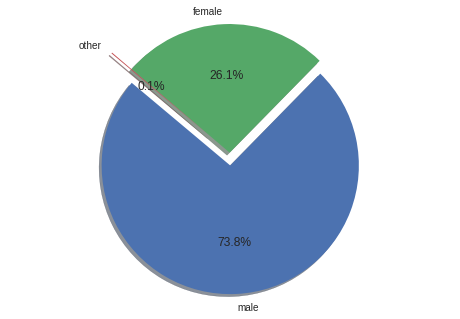

In [19]:
## Get simple data summary
df_gender_unique = df_filter[['user_id','gender']].groupby(['user_id','gender']).size().to_frame()

df_gender_unique.index.names=['user_id','gender']
df_gender_unique.reset_index(inplace=True)
df_gender_unique = df_gender_unique.rename(columns={0: 'count'})

print df_gender_unique['gender'].describe(),"\n"
print df_gender_unique.groupby('gender').size()

labels = df_gender_unique[['gender']].groupby('gender')
groups = dict(list(labels))

plt.pie(list(df_gender_unique.gender.value_counts()), labels=['male','female','other'],\
        autopct='%1.1f%%', shadow=True, startangle=140,\
        explode=(0.1, 0, 0.2))
plt.axis('equal')
plt.show()

## All unique user_id x City

In [6]:
df_city_unique = df_filter[['user_id','city']].groupby(['user_id','city']).size().to_frame()
df_city_unique.index.names=['user_id','city']
df_city_unique.reset_index(inplace=True)
df_city_unique = df_city_unique.rename(columns={0: 'count'})

print df_city_unique['city'].describe(),"\n"
print df_city_unique.groupby('city').size()

count       16062
unique        414
top       Jakarta
freq         6547
Name: city, dtype: object 

city
Abu Dhabi           4
Adiantorop          3
Al Ain              1
Al Faruq            1
Al Mansurah         1
Alfords Point       1
Allahabad           1
                 ... 
Woodside            1
Worcester Park      1
Wroc?aw             1
Xiamen              1
Yogyakarta        311
Yokohama            1
Zhangzhou           1
Length: 414, dtype: int64


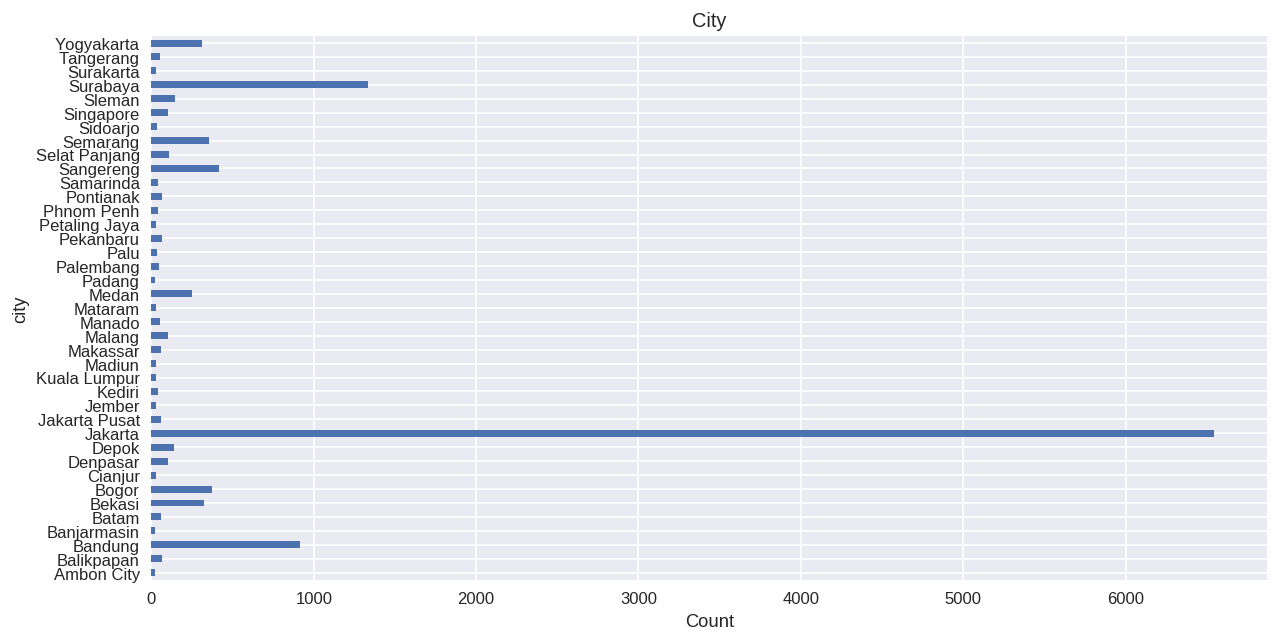

In [7]:
# filter city that only has count that greater 100 and not N-A
cityfilter = df_city_unique[['city']].loc[df_city_unique['city']!='N-A'].groupby(['city']).filter(lambda x: len(x) > 20)

figcity, axcity = plt.subplots(figsize=(12,6), dpi=120)

cityfilter.groupby(['city']).size().plot(kind='barh', stacked=True, title="City", ax=axcity)
plt.xlabel('Count')
plt.show()

## All unique user_id x Gender x City

gender
female     86
male      238
dtype: int64


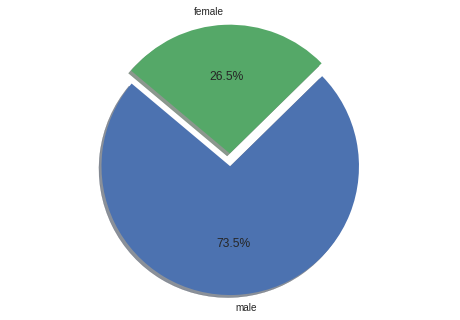

In [8]:
city_to_select = 'bekasi'

df_gender_uncity = df_filter[['user_id','gender']].loc[(df_filter['city'].str.contains(city_to_select, case=False)) & (df_filter['gender']!='other')].groupby(['user_id','gender']).size().to_frame()
df_gender_uncity.index.names=['user_id','gender']
df_gender_uncity.reset_index(inplace=True)
df_gender_uncity = df_gender_uncity.rename(columns={0: 'count'})

print df_gender_uncity.groupby('gender').size()

labels = df_gender_uncity[['gender']].groupby('gender')
groups = dict(list(labels))

plt.pie(list(df_gender_uncity.gender.value_counts()), labels=groups.keys(),\
        autopct='%1.1f%%', shadow=True, startangle=140,\
        explode=(0, 0.1))
plt.axis('equal')
plt.show()